# Benchmarks

## Initialize

In [1]:
#library(Rmisc)
library(dtplyr)
library(tidyverse)
library(glue)
library(arrow)
library(patchwork)
library(data.table)
library("jsonlite")
library(ggthemes)

Warning message:
“package ‘dtplyr’ was built under R version 4.0.3”
Warning message:
“package ‘tidyverse’ was built under R version 4.0.3”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”
Warning message:
“package ‘tibble’ was built under R version 4.0.5”
Warning message:
“package ‘tidyr’ was built under R version 4.0.5”
Warning message:
“package ‘readr’ was built under R version 4.0.5”
Warning message:
“package ‘purrr’ was built under R version 4.0.3”
Warning message:
“package ‘dplyr’ was built under R version 4.0.5”
Warning message:
“package ‘stringr’ was built under R version 4.0.5”
Warning message:
“package ‘forcats’ was built under R version 4.0.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::f

In [2]:
if (grepl("sc", Sys.info()[["nodename"]], fixed=TRUE)) {
    base_path = "/sc-projects/sc-proj-ukb-cvd"
} else {
    base_path = "/data/analysis/ag-reils/ag-reils-shared/cardioRS"}
print(base_path)

project_label = "22_retina_phewas"
project_path = glue("{base_path}/results/projects/{project_label}")
figure_path = glue("{project_path}/figures")
output_path = glue("{project_path}/data")

experiment = '221108'
experiment_path = glue("{output_path}/{experiment}")

[1] "/sc-projects/sc-proj-ukb-cvd"


In [3]:
library(data.table)
library(arrow)

In [4]:
endpoints_md = fread(glue("{experiment_path}/endpoints.csv"), colClasses=c("phecode"="character"))
endpoints = sort(endpoints_md$endpoint)

In [5]:
endpoint_defs = arrow::read_feather(glue("{output_path}/phecode_defs_220306.feather")) %>% arrange(endpoint)

In [6]:
endpoint_selection = c(
    # generally very important
    "phecode_202", # Diabetes mellitus
    "phecode_401",	#Hypertension"  
    "phecode_404", # Ischemic heart disease   
    "phecode_404-1", # Myocardial infarction [Heart attack]
    "phecode_431-11", # Cerebral infarction [Ischemic stroke]
    "phecode_424", # Heart failure

    
    "phecode_059-1", # COVID 19
    "phecode_468", # Pneumonia
    "phecode_474", # Chronic obstructive pulmonary disease [COPD]
      
    "phecode_286-2", #	Major depressive disorder
    "phecode_324-11", #Parkinson's Disease
    "phecode_328", # Dementias and cerebral degeneration

    
    "phecode_164", # Anemia
    "phecode_726-1", # Osteoporosis
    "phecode_371", # Cataract
    "phecode_374-42", # Diabetic retinopathy
    "phecode_374-5", # Macular degeneration
    "phecode_375-1", # Glaucoma
    
    
    "phecode_103", # Malignant neoplasm of the skin
    "phecode_101", # Malignant neoplasm of the digestive organs
    "phecode_102", # LUNG CANCER
    
    "phecode_583", # Chronic kidney disease    
    "phecode_542", # Chronic liver disease and sequelae    
    "OMOP_4306655" # All-Cause Death
    
    # also generally important and relevant
    #"phecode_440-3", # Pulmonary embolism
    #"phecode_468-1",	#Viral pneumonia
#     "phecode_460-2",	#Acute lower respiratory infection
    #"phecode_388" # Blindness and low vision
      # generally important and fun to check
   # "phecode_374-3", # Retinal vascular changes and occlusions
    #"phecode_665", # Psoriasis
#     "phecode_121", # Leukemia
    # important for eye
#     "phecode_705-1", # Rheumatoid arthritis
)

endpoints_common = c(
   'phecode_164', #Anemia
 'phecode_705-1', #Rheumatoid arthritis
 'phecode_328', #Dementias and cerebral degeneration
 'phecode_328-1', #Alzheimer's disease
 'phecode_401', #Hypertension
 'phecode_202', #Diabetes mellitus
 'phecode_416-21', #Atrial fibrillation
 'phecode_404-1', #Myocardial infarction [Heart attack]
 'phecode_424', #Heart failure
 'phecode_468', #Pneumonia
 'phecode_474', #Chronic obstructive pulmonary disease [COPD]
 'phecode_583', #Chronic kidney disease
 'OMOP_4306655' #All-Cause Death
    )
    
endpoints_cardio = c(
    'phecode_438-11',   #  "Abdominal aortic aneurysm",
    'phecode_440-3',#  "Pulmonary embolism", # intervention
    'phecode_413-21',#  "Aortic stenosis", # intervention
    'phecode_400'#  "Rheumatic fever and chronic rheumatic heart diseases",	
)

endpoints_eye= c(
    'phecode_374-5', #Macular degeneration
 'phecode_374-51', #Age-related macular degeneration
 'phecode_374-42', #Diabetic retinopathy
 'phecode_371', #Cataract
 'phecode_388', #Blindness and low vision
 'phecode_367-5', #Uveitis
 'phecode_389-1' #Ocular pain
)

In [7]:
endpoint_defs = endpoint_defs %>% 
    mutate(name = phecode_string) %>%
    mutate(name = 
           case_when( 
               phecode_string == "Myocardial infarction [Heart attack]"~"Myocardial infarction",
               phecode_string == "Cerebral infarction [Ischemic stroke]"~"Ischemic stroke",
               phecode_string == "Chronic obstructive pulmonary disease [COPD]"~"Chronic obstructive pulmonary disease",
               phecode_string == "Mitral valve insufficiency"~"Mitral insufficiency",
               phecode_string == "Parkinson's disease (Primary)"~"Parkinson's disease",
               phecode_string == "Suicide ideation and attempt or self harm"~"Suicide attempt",
               phecode_string == "Ischemic heart disease"~"Coronary heart disease",
               phecode_string == "Chronic kidney disease"~"Chronic kidney disease",
               phecode_string == "Rheumatic fever and chronic rheumatic heart diseases"~"Rheumatic heart disease",
               phecode_string == "Abdominal aortic aneurysm"~"Abdominal aortic aneurysm",
                  TRUE ~ name)
           )
            
endpoint_map = endpoint_defs$name
names(endpoint_map) =  endpoint_defs$endpoint
#endpoint_order = (endpoint_defs %>% arrange(as.numeric(phecode)))$endpoint
endpoint_order = endpoint_selection

In [8]:
endpoints_md %>% filter(endpoint %in% endpoint_selection) %>% as_tibble() %>% arrange(n)  %>%
    mutate(endpoint = recode(endpoint, !!!endpoint_map)) %>% mutate(perc = freq*100)

V1,endpoint,eligable,n,freq,phecode,phecode_string,phecode_category,sex,ICD10_only,phecode_top,leaf,perc
<int>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
285,Parkinson's disease,61159,481,0.007864746,324.11,Parkinson's disease (Primary),Neuro,Both,0,324,1,0.7864746
49,Malignant neoplasm of the thoracic and respiratory organs,61165,686,0.011215564,102,Malignant neoplasm of the thoracic and respiratory organs,Neoplasms,Both,0,102,0,1.1215564
297,Dementias and cerebral degeneration,61233,968,0.015808469,328,Dementias and cerebral degeneration,Neuro,Both,0,328,0,1.5808469
22,COVID-19*,61256,1017,0.016602455,059.1,COVID-19*,ID,Both,1,59,1,1.6602455
568,Ischemic stroke,60849,1157,0.019014281,431.11,Cerebral infarction [Ischemic stroke],Cardio,Both,0,431,1,1.9014281
41,Malignant neoplasm of the digestive organs,60713,1652,0.027209988,101,Malignant neoplasm of the digestive organs,Neoplasms,Both,0,101,0,2.7209988
430,Glaucoma,60486,1664,0.027510498,375.1,Glaucoma,Eye,Both,0,375,0,2.7510498
421,Diabetic retinopathy,60400,1760,0.029139073,374.42,Diabetic retinopathy,Eye,Both,0,374,1,2.9139073
505,Myocardial infarction,60213,1800,0.029893877,404.1,Myocardial infarction [Heart attack],Cardio,Both,0,404,0,2.9893877


In [9]:
#today = substr(Sys.time(), 0, 10) # YYYY-MM-DD
today = '221109'

In [10]:
eligable_eids = arrow::read_feather(glue("{output_path}/eligable_eids_long_{today}.feather")) %>% 
    mutate(included = 1)
eligable_eids$eid = as.numeric(levels(eligable_eids$eid))[eligable_eids$eid]

Warning message:
“Coercing dictionary values to R character factor levels”


In [11]:
data_outcomes = arrow::read_feather(glue("{output_path}/baseline_outcomes_long_220627.feather", as_data_frame=FALSE)) 

In [12]:
partitions = 0:21
crop_ratio = "0.66" # 0.3, 0.5, 0.8
partitions
paths = c()
for (p in partitions){
    #temp_path = glue("{experiment_path}/loghs/Identity(Records)+MLP/{p}/test.feather")
    temp_path = glue("{experiment_path}/loghs/ImageTraining_[]_ConvNeXt_MLPHead_predictions_cropratio{crop_ratio}/{p}/test.feather")
    paths = c(paths, temp_path)
    }

[1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21

In [13]:
read_predictions = function(paths, endpoint_list){
    predictions = paths %>% map_df(
        ~suppressWarnings(read_feather(., col_select=c("eid", all_of(endpoint_list)))) %>% 
        pivot_longer(all_of(endpoint_list), names_to="endpoint", values_to="logh") %>%
        mutate(eid = as.integer(as.character(eid))) %>%
        select(endpoint, eid, logh))# %>% arrange(endpoint, eid)
    return(predictions)
    }

map <- c(`1` = 'top10',
            `2` = 'rest',
         `3` = 'rest',
         `4` = 'rest',
         `5` = 'rest',
         `6` = 'rest',
         `7` = 'rest',
         `8` = 'rest',
         `9` = 'rest',
         `10` = 'rest')

calc_ratios = function(pred_outcomes, endpoints_md){
    
    logh_inc = pred_outcomes %>% 
        filter(included==1) %>% 
        group_by(endpoint) %>% 
        mutate(logh_perc = ntile(logh, 10)) %>% 
#         mutate(logh_perc=case_when(logh_perc %in% 1:9 ~ 1, 
#                                     logh_perc %in% 10:11 ~ 10,
#                                     TRUE ~ "NA")) %>%
        ungroup()

    logh_T_agg = logh_inc %>% group_by(endpoint, logh_perc) %>% summarise(n=sum(event, na.rm=TRUE), event_rate = mean(event)) #%>% as_tibble()
    temp_ordered = logh_T_agg %>% mutate(endpoint = factor(endpoint, levels=endpoints_md$endpoint)) 
    temp_ratios = temp_ordered %>% #filter(logh_perc %in% c(1, 10)) %>% 
        pivot_wider(names_from=logh_perc, values_from=c(n, event_rate)) %>% 
        mutate(event_rate_ratio=event_rate_10/event_rate_1) %>%
#             mutate(ratio=ratio_top10/ratio_rest) %>%

        #mutate(endpoint_string = recode(endpoint, !!!endpoint_map)) %>%
        #select(endpoint, n_1, n_10, event_rate_1, ratio_10, ratio) %>%
#             select(endpoint, n_top10, n_rest, ratio_top10, ratio_rest, ratio) %>%

        arrange(event_rate_ratio) #%>% as_tibble()
    return(temp_ratios)
    }

In [14]:
prepare_ratios = function(endpoint_list){
    
    temp_outcomes = data_outcomes %>% filter(endpoint %in% endpoint_list)
    temp_eligability = eligable_eids %>% filter(endpoint %in% endpoint_list)
    temp_outcomes_eligability = temp_outcomes %>% left_join(temp_eligability, by=c("eid", "endpoint"))
    pred_outcomes = read_predictions(paths, endpoint_list) %>% left_join(temp_outcomes_eligability, on=c(eid, endpoint)) %>% as_tibble()
    temp_df = calc_ratios(pred_outcomes, endpoints_md)
    
    return(temp_df)
    }

In [15]:
ep_chunks = split(endpoints_md$endpoint, ceiling(seq_along(endpoints_md$endpoint)/500))

In [16]:
ratio_dfs = c()
for (i in 1:length(ep_chunks)){
    endpoint_list = ep_chunks[[i]]
    ratio_dfs[[i]] = prepare_ratios(endpoint_list)
    print(ratio_dfs[[i]])
    flush.console()
}

In [ ]:
ratio_df_complete = bind_rows(ratio_dfs) %>% ungroup() %>%
    mutate(endpoint_string = recode(endpoint, !!!endpoint_map)) %>% 
    #select(endpoint, endpoint_string, n_1, n_10, ratio_1, ratio_10, ratio) %>%
#     select(endpoint, endpoint_string, n_top10, n_rest, ratio_top10, ratio_rest, ratio) %>%

    arrange(event_rate_ratio) %>% left_join(endpoints_md %>% select(endpoint, phecode_category) %>% as_tibble(), by="endpoint")

ratio_df_complete

In [ ]:
options(pillar.print_max = Inf)
ratio_df_complete %>% 
    arrange(event_rate_ratio) %>%
    mutate_if(is.numeric, round, 3) %>%
    write_csv(glue("outputs/SupplTable1_RateRatiosAll_CropRatio-0.66.csv"))

In [ ]:
# 0.66:
cat("nrows with rate ratio > 1 :", nrow(ratio_df_complete %>% filter(event_rate_ratio > 1)))
cat("\nnrows with rate ratio > 3 :", nrow(ratio_df_complete %>% filter(event_rate_ratio > 3)))
cat("\nnrows with rate ratio > 5 :", nrow(ratio_df_complete %>% filter(event_rate_ratio > 5)))
cat("\nnrows with rate ratio > 10 :", nrow(ratio_df_complete %>% filter(event_rate_ratio > 10)))
cat("\nnrows with rate ratio > 50 :", nrow(ratio_df_complete %>% filter(event_rate_ratio > 50)))

In [ ]:
1/0

In [18]:
options(repr.matrix.max.rows=1e9, repr.matrix.max.cols=1e9)

ratio_df_complete = read_csv(glue("outputs/SupplTable1_RateRatiosAll_CropRatio-0.66.csv"))


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  endpoint = col_character(),
  endpoint_string = col_character(),
  phecode_category = col_character()
)
ℹ Use `spec()` for the full column specifications.



In [19]:
ratio_df_complete %>% head()

endpoint,n_1,n_2,n_3,n_4,n_5,n_6,n_7,n_8,n_9,n_10,event_rate_1,event_rate_2,event_rate_3,event_rate_4,event_rate_5,event_rate_6,event_rate_7,event_rate_8,event_rate_9,event_rate_10,event_rate_ratio,endpoint_string,phecode_category
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
phecode_719-11,17,8,13,16,15,11,20,17,15,10,0.003,0.001,0.002,0.003,0.002,0.002,0.003,0.003,0.002,0.002,0.588,Spasm of muscle,Musc/Skel
phecode_604-1,27,14,15,17,16,19,20,25,13,17,0.010,0.005,0.005,0.006,0.006,0.007,0.007,0.009,0.005,0.006,0.630,Redundant prepuce and phimosis,Genitourinary
phecode_391-21,16,19,19,19,25,23,17,22,13,11,0.003,0.003,0.003,0.003,0.004,0.004,0.003,0.004,0.002,0.002,0.688,Eustachian salpingitis,Hearing
phecode_614-54,14,8,15,7,14,9,7,10,10,10,0.004,0.002,0.005,0.002,0.004,0.003,0.002,0.003,0.003,0.003,0.715,Abscess or ulceration of vulva,Genitourinary
phecode_230-22,13,6,14,21,11,16,16,28,19,10,0.002,0.001,0.002,0.003,0.002,0.003,0.003,0.005,0.003,0.002,0.769,Underweight,Metab
phecode_144-3,13,19,16,10,11,18,22,23,16,10,0.004,0.006,0.005,0.003,0.003,0.005,0.007,0.007,0.005,0.003,0.769,Benign neoplasms of the ovary,Neoplasms


In [20]:
ratio_df_complete %>% 
    select(endpoint, endpoint_string, phecode_category, event_rate_ratio) %>%
    filter(phecode_category %in% c('Neuro'))
#%>% filter(event_rate_ratio <= 1.5) 

endpoint,endpoint_string,phecode_category,event_rate_ratio
<chr>,<chr>,<chr>,<dbl>
phecode_325-1,Abnormal involuntary movements,Neuro,0.850
phecode_336-52,Meralgia paresthetica,Neuro,0.857
phecode_331-3,"Headache syndromes, non migraine",Neuro,1.050
phecode_329-42,Cognitive communication deficit,Neuro,1.111
phecode_329-4,Other specified cognitive deficit,Neuro,1.348
phecode_351-3,Paresthesia of skin*,Neuro,1.368
phecode_351-1,Anesthesia of skin*,Neuro,1.376
phecode_352,Disturbances of sensation of smell and taste,Neuro,1.400
phecode_333,Sleep disorders,Neuro,1.543


In [21]:
#ratio_df_complete %>% filter(event_rate_ratio<10) %>% arrange(desc(ratio_1)) #%>% filter(!str_detect(endpoint, "-"))

In [22]:
base_size = 8
title_size = 10
facet_size = 8.5
geom_text_size=3
theme_set(theme_classic(base_size = base_size) + 
          theme(strip.background = element_blank(), plot.title=element_text(size=title_size, hjust=0), 
                strip.text.x = element_text(size = facet_size),axis.title=element_text(size=10), axis.text=element_text(size=8, color="black"),
                legend.position="bottom", axis.line = element_line(size = 0.2), axis.ticks=element_line(size=0.2)))

## Nice overview over all categories

### crop ratio 0.3

Warning message:
“package ‘ggtext’ was built under R version 4.0.3”


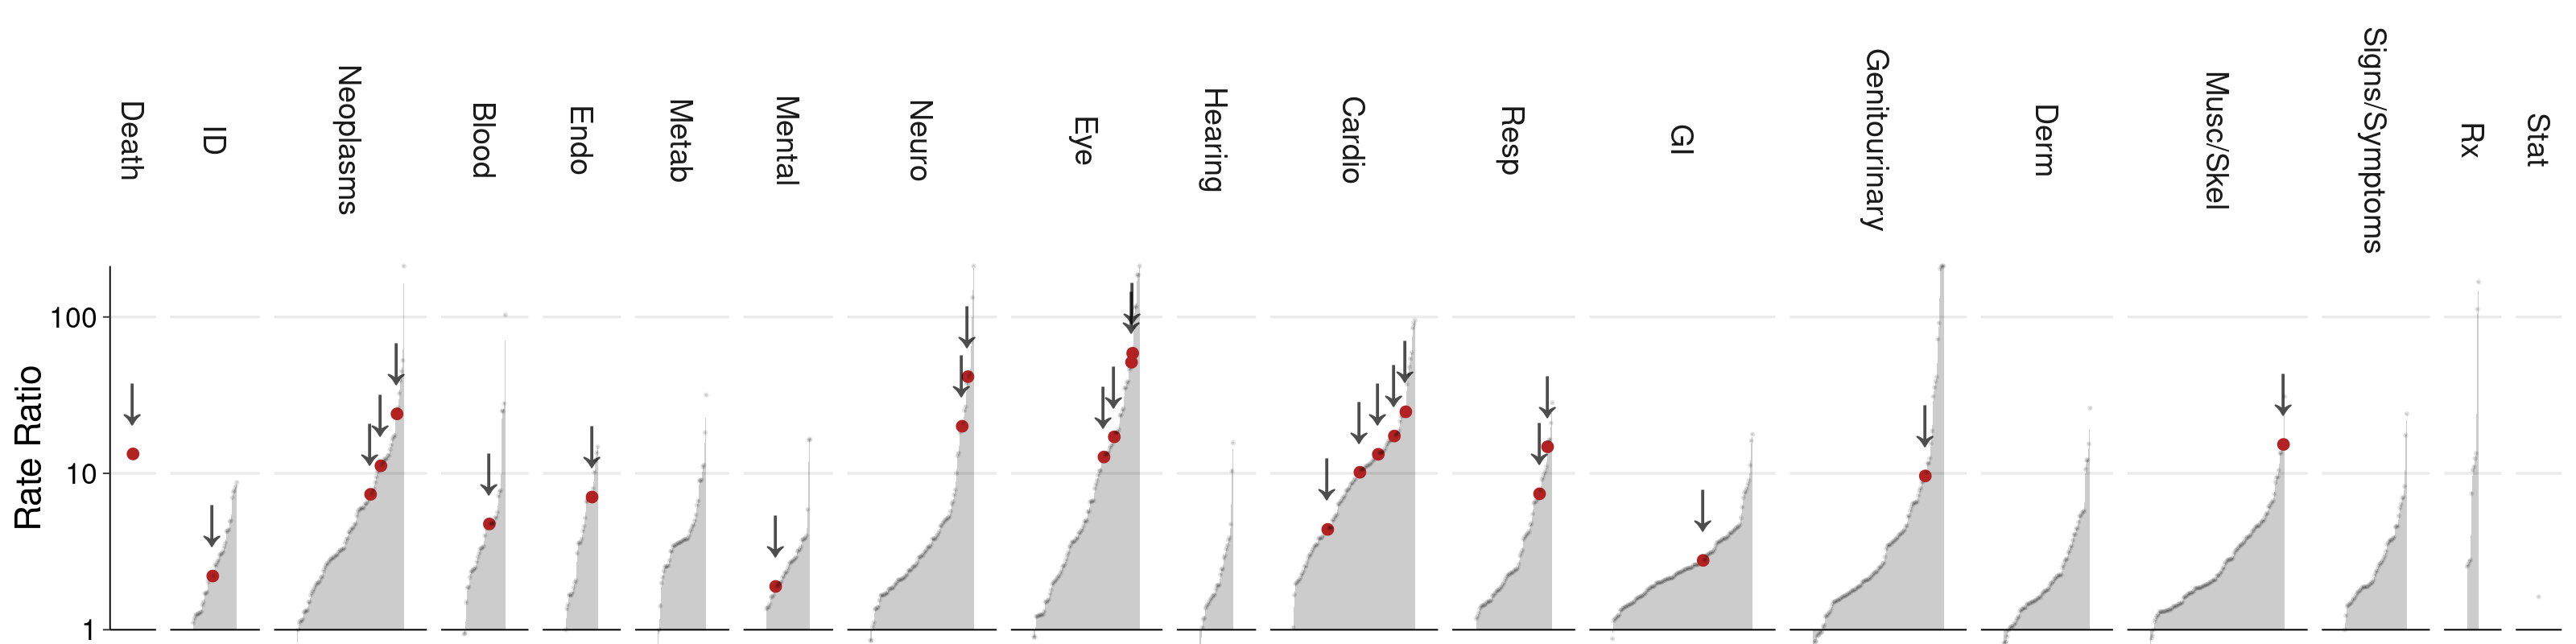

In [23]:
plot_width = 10; plot_height=2.5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

library(ggtext)
categories_sorted = (endpoints_md %>% arrange(endpoint) %>% distinct(phecode_category) %>% as_tibble())$phecode_category

temp = ratio_df_complete %>%
    mutate(phecode_category = factor(phecode_category, levels=categories_sorted)) %>%
    mutate(highlight = case_when(endpoint %in% endpoint_selection ~ "YES", TRUE ~ "NO")) 
#+    mutate(score = factor(score, levels=scores_plot)) %>%
#+    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
#+    ungroup() %>%
#+    pivot_wider(names_from=score, values_from=cindex) %>% 
#+    mutate(id = row_number()) %>%
#+    mutate(delta = `Age+Sex+Retina`-`Age+Sex`) %>%
#+    group_by(endpoint, phecode_string, phecode_category) %>%
#+    summarise(delta = median(delta)) %>%
#+    mutate(pos = case_when(delta>=0 ~ "pos", delta < 0 ~"neg")) %>%
#+    mutate(endpoint = fct_reorder(endpoint, delta)) %>%
    # %>%# %>% filter(endpoint %in% endpoint_sample)
#+    

endpoint_order = (temp %>% arrange(event_rate_ratio))$endpoint

temp = temp %>% mutate(endpoint = factor(endpoint, levels=endpoint_order)) %>% ungroup() %>% arrange(endpoint) %>% group_by(phecode_category) %>% mutate(endpoint = row_number()) %>% mutate(log_ratio = log(event_rate_ratio))

overview = ggplot(temp) +
    geom_ribbon(aes(x=endpoint, ymin=0, ymax=log_ratio), fill="black", alpha=0.2)+
    geom_point(aes(x=endpoint, y=log_ratio, color=highlight, size=highlight, alpha=highlight)) +
    geom_text(data=temp %>% filter(highlight=="YES"), aes(x=endpoint, y=log_ratio+0.5, label="↓", vjust=0), color="black", size=5, alpha=0.7) +
    #geom_segment(aes(x=endpoint, xend=endpoint, y=0, yend=delta, color=highlight, size=highlight), alpha=0.5)+#+
    labs(x="Endpoints", y="Rate Ratio") +# (Top vs. Bottom 10%)")+
    scale_color_manual(values=c("NO"="black", "YES"="firebrick"))+
    scale_alpha_manual(values=c("NO"=0.1, "YES"=1))+
    scale_size_manual(values=c("NO"=0.01, "YES"=1))+
    #scale_colour_manual(values = c("pos"="forestgreen", "neg" = "firebrick")) + 
    #coord_polar() +
    coord_cartesian(ylim=c(0, NA), clip = "off")+
    scale_y_continuous(expand=c(0, 0), breaks=c(log(1), log(10), log(100), log(1000)), labels=c(1, 10, 100, 1000)) +
    #scale_y_continuous(, trans='log10')+
    scale_x_discrete(expand=expansion(add=20))+
    facet_grid(~phecode_category, scales="free_x", space="free_x")+#, switch=TRUE)+
    #facet_grid2(~phecode_category, scales = "free", independent = "all") + 
    theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        panel.grid.major.y=element_line(), 
         strip.text = element_text(angle=270)) + 
    theme(legend.position="none") 
    
    #geom_ribbon(aes(x=id, ymin=AgeSex, ymax=`Age+Sex+Retina`), fill="red", alpha=0.2)
#geom_violin(size=0.1)
overview

### crop ratio 0.8

### crop ratio 0.5 with only positive ratios (negative set to 0)

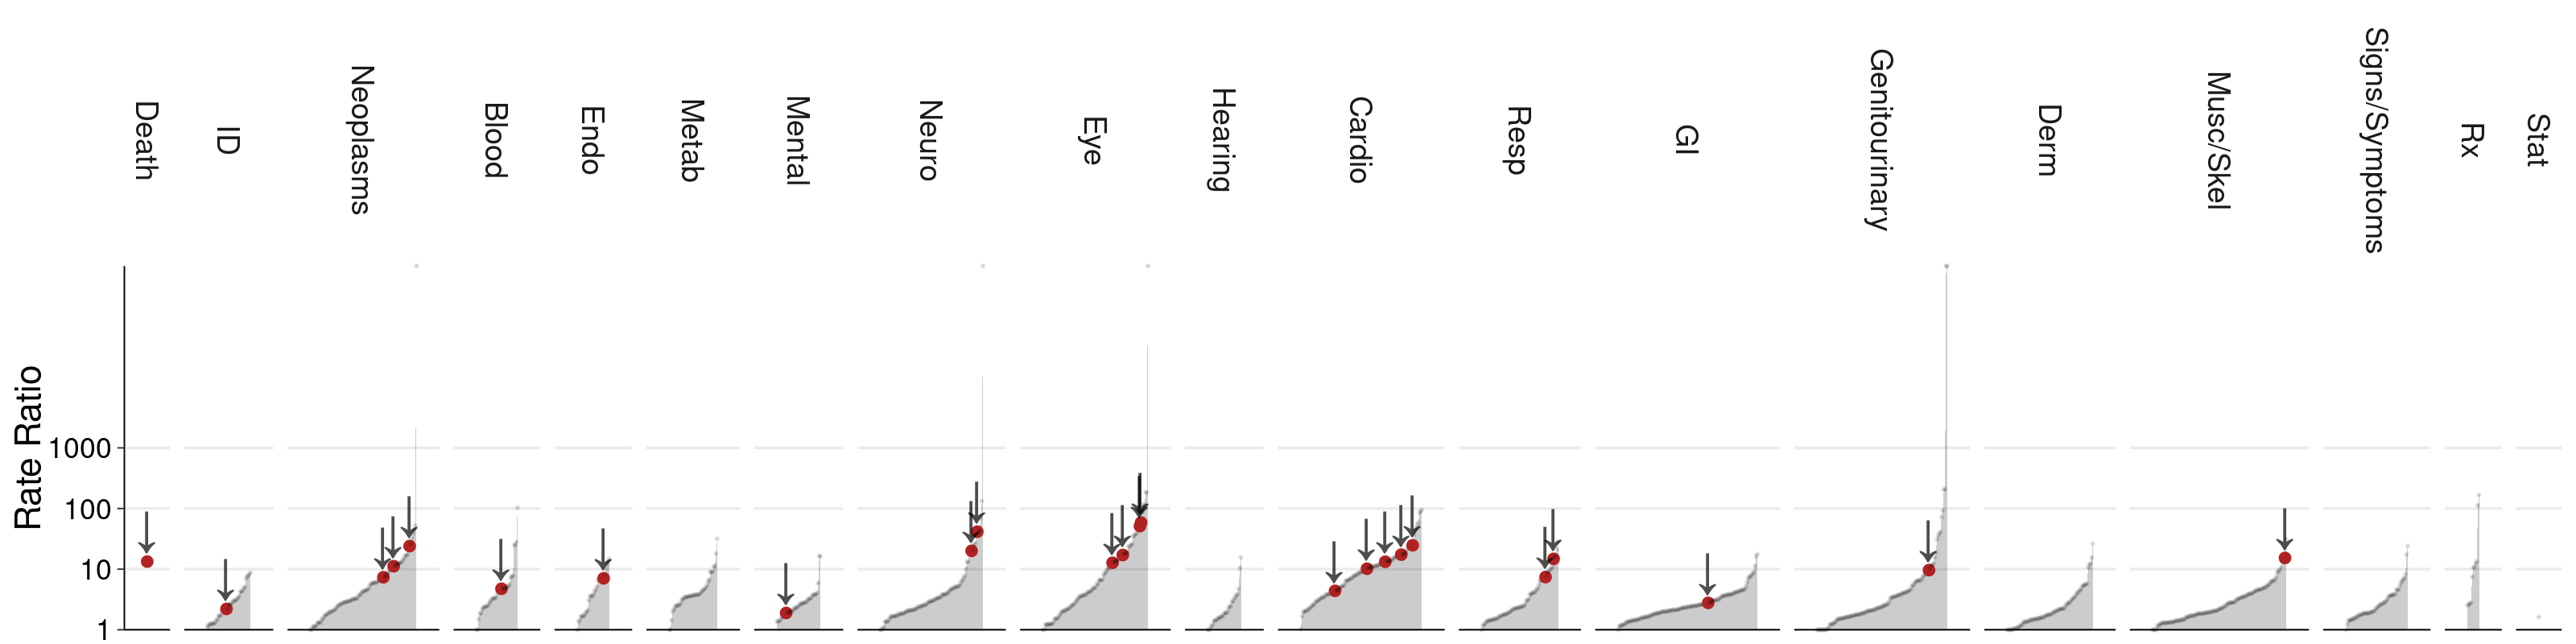

In [24]:
plot_width = 10; plot_height=2.5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

library(ggtext)
categories_sorted = (endpoints_md %>% arrange(endpoint) %>% distinct(phecode_category) %>% as_tibble())$phecode_category

temp_pos = ratio_df_complete %>%
    mutate(phecode_category = factor(phecode_category, levels=categories_sorted)) %>%
    mutate(highlight = case_when(endpoint %in% endpoint_selection ~ "YES", TRUE ~ "NO")) 
#+    mutate(score = factor(score, levels=scores_plot)) %>%
#+    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
#+    ungroup() %>%
#+    pivot_wider(names_from=score, values_from=cindex) %>% 
#+    mutate(id = row_number()) %>%
#+    mutate(delta = `Age+Sex+Retina`-`Age+Sex`) %>%
#+    group_by(endpoint, phecode_string, phecode_category) %>%
#+    summarise(delta = median(delta)) %>%
#+    mutate(pos = case_when(delta>=0 ~ "pos", delta < 0 ~"neg")) %>%
#+    mutate(endpoint = fct_reorder(endpoint, delta)) %>%
    # %>%# %>% filter(endpoint %in% endpoint_sample)
#+    

endpoint_order = (temp_pos %>% arrange(event_rate_ratio))$endpoint

#index <- temp_pos$ratio < 0
#temp_pos$ratio[index] <- 0.


temp_pos = temp_pos %>% mutate(endpoint = factor(endpoint, levels=endpoint_order)) %>% ungroup() %>% arrange(endpoint) %>% group_by(phecode_category) %>% mutate(endpoint = row_number()) %>% mutate(log_ratio = log(event_rate_ratio))

index <- temp_pos$log_ratio < 0
temp_pos$log_ratio[index] <- 0.

overview = ggplot(temp_pos) +
    geom_ribbon(aes(x=endpoint, ymin=0, ymax=log_ratio), fill="black", alpha=0.2)+
    geom_point(aes(x=endpoint, y=log_ratio, color=highlight, size=highlight, alpha=highlight)) +
    geom_text(data=temp_pos %>% filter(highlight=="YES"), aes(x=endpoint, y=log_ratio+0.5, label="↓", vjust=0), color="black", size=5, alpha=0.7) +
    #geom_segment(aes(x=endpoint, xend=endpoint, y=0, yend=delta, color=highlight, size=highlight), alpha=0.5)+#+
    labs(x="Endpoints", y="Rate Ratio") +# (Top vs. Bottom 10%)")+
    scale_color_manual(values=c("NO"="black", "YES"="firebrick"))+
    scale_alpha_manual(values=c("NO"=0.1, "YES"=1))+
    scale_size_manual(values=c("NO"=0.01, "YES"=1))+
    #scale_colour_manual(values = c("pos"="forestgreen", "neg" = "firebrick")) + 
    #coord_polar() +
    coord_cartesian(ylim=c(0, log(1000000)), clip = "off")+
    scale_y_continuous(expand=c(0, 0), breaks=c(log(1), log(10), log(100), log(1000)), labels=c(1, 10, 100, 1000)) +
    #scale_y_continuous(, trans='log10')+
    scale_x_discrete(expand=expansion(add=20))+
    facet_grid(~phecode_category, scales="free_x", space="free_x")+#, switch=TRUE)+
    #facet_grid2(~phecode_category, scales = "free", independent = "all") + 
    theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        panel.grid.major.y=element_line(), 
         strip.text = element_text(angle=270)) + 
    theme(legend.position="none") 
    
    #geom_ribbon(aes(x=id, ymin=AgeSex, ymax=`Age+Sex+Retina`), fill="red", alpha=0.2)
#geom_violin(size=0.1)
overview

In [25]:
plot_name = "FIGURE2A_RR_overview"
overview %>% ggsave(filename=glue("outputs/{plot_name}.pdf"), device="pdf", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '↓' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '↓' in 'mbcsToSbcs': dot substituted for <86>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '↓' in 'mbcsToSbcs': dot substituted for <93>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '↓' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '↓' in 'mbcsToSbcs': dot substituted for <86>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '↓' in 'mbcsToSbcs': dot substituted for <93>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label

## Endpoint selection for health state and incident disease rates

In [ ]:
predictions = paths %>% map_df(
    ~suppressWarnings(read_feather(., col_select=c("eid", all_of(endpoint_selection)))) %>% 
    pivot_longer(endpoint_selection, names_to="endpoint", values_to="logh") %>%
    mutate(eid = as.integer(as.character(eid))) %>%
    select(endpoint, eid, logh))# %>% arrange(endpoint, eid)
predictions %>% head()

pred_outcomes = predictions %>% left_join(data_outcomes, on=c(eid, endpoint)) %>% as.data.table() #%>% as_tibble()

In [ ]:
logh_inc = pred_outcomes %>% filter(included==1) %>% group_by(endpoint) %>% mutate(logh_perc = ntile(logh, 100)) %>% ungroup() %>% as_tibble()

In [ ]:
logh_T_agg = logh_inc %>% group_by(endpoint, logh_perc) %>% summarise(n=sum(event), ratio = mean(event)) %>% as_tibble()

In [ ]:
#logh_T_endpoint = logh_inc %>% group_by(endpoint) %>% summarise(n_all=sum(event), ratio_all = mean(event)) %>% as_tibble()

In [ ]:
endpoint_order

In [ ]:
plot_width = 8.25; plot_height=6; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)
#temp_rank = event_rest %>% filter(features=="Metabolomics") %>% arrange(desc(MET10PercvsREST))
#endpoint_order = (endpoint_defs %>% mutate(phecode_rank = as.numeric(phecode)) %>% arrange(phecode_rank) %>% as_tibble())$endpoint
temp = logh_T_agg %>% filter(endpoint %in% endpoint_selection) %>% mutate(endpoint = factor(endpoint, levels=endpoint_order)) %>% ungroup() %>% arrange(endpoint) #%>% sample_n(10000)

fig2a = ggplot(temp, aes(x=logh_perc, y=ratio*100, color=logh_perc)) + 
    labs(title=NULL, x="Risk Percentile (%)", y="Incident Events (%)") +
    geom_point(alpha=0.7, size=0.3) + 
    scale_colour_gradient(low = "#7AC6FF", high = "#023768", space = "Lab", na.value = "grey50", guide = "colourbar", aesthetics = "colour")+
    scale_y_continuous(limits=c(0, NA), expand=expansion(mult=c(0, .05)))+#, limits=c(0, NA))+
    scale_x_continuous(expand=expansion(add=c(0, 1)))+
    facet_wrap(~endpoint, scale="free", labeller = labeller(endpoint = as_labeller(endpoint_map, default=label_wrap_gen(22))), ncol=6) + theme(legend.position="none")
fig2a

In [ ]:
plot_width = 8.25; plot_height=3.5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)
#temp_rank = event_rest %>% filter(features=="Metabolomics") %>% arrange(desc(MET10PercvsREST))
#endpoint_order = (endpoint_defs %>% mutate(phecode_rank = as.numeric(phecode)) %>% arrange(phecode_rank) %>% as_tibble())$endpoint
temp = logh_T_agg %>% filter(endpoint %in% endpoint_selection) %>% mutate(endpoint = factor(endpoint, levels=endpoint_order)) %>% ungroup() %>% arrange(endpoint) #%>% sample_n(10000)

fig2a_common = ggplot(temp %>% filter(endpoint %in% endpoints_common), aes(x=logh_perc, y=ratio*100, color=logh_perc)) + 
    labs(title=NULL, x="Risk Percentile (%)", y="Incident Events (%)") +
    geom_point(alpha=0.7, size=0.3) + 
    scale_colour_gradient(low = "#7AC6FF", high = "#023768", space = "Lab", na.value = "grey50", guide = "colourbar", aesthetics = "colour")+
    scale_y_continuous(limits=c(0, NA), expand=expansion(mult=c(0, .05)))+#, limits=c(0, NA))+
    scale_x_continuous(expand=expansion(add=c(0, 1)))+
    facet_wrap(~endpoint, scale="free", labeller = labeller(endpoint = as_labeller(endpoint_map, default=label_wrap_gen(22))), ncol=6) + theme(legend.position="none")
fig2a_common

In [ ]:
plot_width = 8.25; plot_height=1.75; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)
#temp_rank = event_rest %>% filter(features=="Metabolomics") %>% arrange(desc(MET10PercvsREST))
#endpoint_order = (endpoint_defs %>% mutate(phecode_rank = as.numeric(phecode)) %>% arrange(phecode_rank) %>% as_tibble())$endpoint
temp = logh_T_agg %>% filter(endpoint %in% endpoint_selection) %>% mutate(endpoint = factor(endpoint, levels=endpoint_order)) %>% ungroup() %>% arrange(endpoint) #%>% sample_n(10000)

fig2a_cardio = ggplot(temp %>% filter(endpoint %in% endpoints_cardio), aes(x=logh_perc, y=ratio*100, color=logh_perc)) + 
    labs(title=NULL, x="Risk Percentile (%)", y="Incident Events (%)") +
    geom_point(alpha=0.7, size=0.3) + 
    scale_colour_gradient(low = "#7AC6FF", high = "#023768", space = "Lab", na.value = "grey50", guide = "colourbar", aesthetics = "colour")+
    scale_y_continuous(limits=c(0, NA), expand=expansion(mult=c(0, .05)))+#, limits=c(0, NA))+
    scale_x_continuous(expand=expansion(add=c(0, 1)))+
    facet_wrap(~endpoint, scale="free", labeller = labeller(endpoint = as_labeller(endpoint_map, default=label_wrap_gen(22))), ncol=6) + theme(legend.position="none")
fig2a_cardio

In [ ]:
plot_width = 8.25; plot_height=1.75; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)
#temp_rank = event_rest %>% filter(features=="Metabolomics") %>% arrange(desc(MET10PercvsREST))
#endpoint_order = (endpoint_defs %>% mutate(phecode_rank = as.numeric(phecode)) %>% arrange(phecode_rank) %>% as_tibble())$endpoint
temp = logh_T_agg %>% filter(endpoint %in% endpoint_selection) %>% mutate(endpoint = factor(endpoint, levels=endpoint_order)) %>% ungroup() %>% arrange(endpoint) #%>% sample_n(10000)

fig2a_interesting = ggplot(temp %>% filter(endpoint %in% endpoints_interesting), aes(x=logh_perc, y=ratio*100, color=logh_perc)) + 
    labs(title=NULL, x="Risk Percentile (%)", y="Incident Events (%)") +
    geom_point(alpha=0.7, size=0.3) + 
    scale_colour_gradient(low = "#7AC6FF", high = "#023768", space = "Lab", na.value = "grey50", guide = "colourbar", aesthetics = "colour")+
    scale_y_continuous(limits=c(0, NA), expand=expansion(mult=c(0, .05)))+#, limits=c(0, NA))+
    scale_x_continuous(expand=expansion(add=c(0, 1)))+
    facet_wrap(~endpoint, scale="free", labeller = labeller(endpoint = as_labeller(endpoint_map, default=label_wrap_gen(22))), ncol=6) + theme(legend.position="none")
fig2a_interesting

# Kaplan Mayer

In [ ]:
logh_mh = logh_inc %>% select(endpoint, eid, logh_perc, event, time) %>% group_by(endpoint) %>% 
    mutate(MH=case_when(logh_perc %in% 100 ~ "High", 
                        logh_perc %in% 51 ~ "Mid", 
                        logh_perc %in% 1 ~ "Low",
                        TRUE ~ "NA")
          ) %>% mutate(MH=fct_rev(factor(MH, levels=c("Low", "Mid", "High")))) %>% ungroup() %>% 
    filter(MH!="NA") #%>% select(eid, endpoint, logh, logh_group)

In [ ]:
require("ggquickeda")
plot_width = 8.25; plot_height=6; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)
met_map = c("High"="#023768", "Mid"="#4F8EC1", "Low"="#7AC6FF")

temp = logh_mh %>% mutate(endpoint = factor(endpoint, levels=endpoint_order)) %>% filter(endpoint %in% endpoint_selection) %>% ungroup() 

fig2b = ggplot(temp, aes(time = time, status = event, fill=MH, color=MH, group=MH)) +
    geom_km(trans = "event") + 
    geom_kmticks(trans = "event", size=0.2, alpha=0.01) + 
    geom_kmband(trans = "event") + 
    labs(x="Time (Years)", y="Cumulative Events (%)")+
    scale_color_manual(values=met_map)+scale_fill_manual(values=met_map)+
    scale_y_continuous(labels = function(x) round(x*100, 1), expand=c(0, 0))+
    scale_x_continuous(expand=expansion(add=c(0, .1)), breaks=c(5, 10))+
    facet_wrap(~endpoint, scale="free", labeller = labeller(endpoint = as_labeller(endpoint_map, default=label_wrap_gen(22))), ncol=6) + theme(legend.position="none")
fig2b

In [ ]:
require("ggquickeda")
plot_width = 8.25; plot_height=3.5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)
met_map = c("High"="#023768", "Mid"="#4F8EC1", "Low"="#7AC6FF")

temp = logh_mh %>% mutate(endpoint = factor(endpoint, levels=endpoint_order)) %>% filter(endpoint %in% endpoint_selection) %>% ungroup() 

fig2b_common = ggplot(temp %>% filter(endpoint %in% endpoints_common), aes(time = time, status = event, fill=MH, color=MH, group=MH)) +
    geom_km(trans = "event") + 
    geom_kmticks(trans = "event", size=0.2, alpha=0.01) + 
    geom_kmband(trans = "event") + 
    labs(x="Time (Years)", y="Cumulative Events (%)")+
    scale_color_manual(values=met_map)+scale_fill_manual(values=met_map)+
    scale_y_continuous(labels = function(x) round(x*100, 1), expand=c(0, 0))+
    scale_x_continuous(expand=expansion(add=c(0, .1)), breaks=c(5, 10))+
    facet_wrap(~endpoint, scale="free", labeller = labeller(endpoint = as_labeller(endpoint_map, default=label_wrap_gen(22))), ncol=6) + theme(legend.position="none")
fig2b_common

In [ ]:
require("ggquickeda")
plot_width = 8.25; plot_height=1.75; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)
met_map = c("High"="#023768", "Mid"="#4F8EC1", "Low"="#7AC6FF")

temp = logh_mh %>% mutate(endpoint = factor(endpoint, levels=endpoint_order)) %>% filter(endpoint %in% endpoint_selection) %>% ungroup() 

fig2b_cardio = ggplot(temp %>% filter(endpoint %in% endpoints_cardio), aes(time = time, status = event, fill=MH, color=MH, group=MH)) +
    geom_km(trans = "event") + 
    geom_kmticks(trans = "event", size=0.2, alpha=0.01) + 
    geom_kmband(trans = "event") + 
    labs(x="Time (Years)", y="Cumulative Events (%)")+
    scale_color_manual(values=met_map)+scale_fill_manual(values=met_map)+
    scale_y_continuous(labels = function(x) round(x*100, 1), expand=c(0, 0))+
    scale_x_continuous(expand=expansion(add=c(0, .1)), breaks=c(5, 10))+
    facet_wrap(~endpoint, scale="free", labeller = labeller(endpoint = as_labeller(endpoint_map, default=label_wrap_gen(22))), ncol=6) + theme(legend.position="none")
fig2b_cardio

In [ ]:
require("ggquickeda")
plot_width = 8.25; plot_height=1.75; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)
met_map = c("High"="#023768", "Mid"="#4F8EC1", "Low"="#7AC6FF")

temp = logh_mh %>% mutate(endpoint = factor(endpoint, levels=endpoint_order)) %>% filter(endpoint %in% endpoint_selection) %>% ungroup() 

fig2b_interesting = ggplot(temp %>% filter(endpoint %in% endpoints_interesting), aes(time = time, status = event, fill=MH, color=MH, group=MH)) +
    geom_km(trans = "event") + 
    geom_kmticks(trans = "event", size=0.2, alpha=0.01) + 
    geom_kmband(trans = "event") + 
    labs(x="Time (Years)", y="Cumulative Events (%)")+
    scale_color_manual(values=met_map)+scale_fill_manual(values=met_map)+
    scale_y_continuous(labels = function(x) round(x*100, 1), expand=c(0, 0))+
    scale_x_continuous(expand=expansion(add=c(0, .1)), breaks=c(5, 10))+
    facet_wrap(~endpoint, scale="free", labeller = labeller(endpoint = as_labeller(endpoint_map, default=label_wrap_gen(22))), ncol=6) + theme(legend.position="none")
fig2b_interesting

In [ ]:
plot_width = 8.25; plot_height=12; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

fig2 = (fig2a / fig2b)
fig2

In [ ]:
plot_width = 8.25; plot_height=6; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

fig2_common = (fig2a_common / fig2b_common)
fig2_common

In [ ]:
plot_width = 8.25; plot_height=3.5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

fig2_cardio = (fig2a_cardio / fig2b_cardio)
fig2_cardio

In [ ]:
plot_name = "Figure_2_EventRates"
fig2 %>% ggsave(filename=glue("outputs/{plot_name}.pdf"), device="pdf", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)

In [ ]:
plot_width = 50; plot_height=75; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)
#temp_rank = event_rest %>% filter(features=="Metabolomics") %>% arrange(desc(MET10PercvsREST))
endpoint_order = (phecode_defs %>% mutate(phecode_rank = as.numeric(phecode)) %>% arrange(phecode_rank) %>% as_tibble())$endpoint
endpoint_selection = endpoint_order# %>% head(500)
temp = logh_T_agg %>% filter(model=="GNN(Records)+MLP") %>% mutate(endpoint = factor(endpoint, levels=endpoint_order)) %>% filter(endpoint %in% endpoint_selection) %>% ungroup() #%>% sample_n(10000)

mh_events = ggplot(temp, aes(x=logh_perc, y=ratio*100, color=logh_perc)) + 
    labs(title=NULL, x="Retina Percentile [%]", y="Observed Event Rate [%]") +
    geom_point(alpha=0.7, size=0.1) + 
    scale_colour_gradient(
  low = "#7AC6FF",
  high = "#023768",
  space = "Lab",
  na.value = "grey50",
  guide = "colourbar",
  aesthetics = "colour"
)+
    #scale_color_manual(values=c("Metabolomics"="black"))+
    scale_y_continuous(limits=c(0, NA), expand=expansion(mult=c(0, .05)))+#, limits=c(0, NA))+
    scale_x_continuous(expand=expansion(add=c(0, 1)))+
    facet_wrap(~endpoint, scale="free", labeller = labeller(endpoint = endpoint_map), ncol=25) + theme(legend.position="none")

In [ ]:
plot_name = "RetinaRisk"
mh_events %>% ggsave(filename=glue("outputs/{plot_name}.png"), device="png", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)

## Add buffer

In [ ]:
pred_outcomes %>% head()

In [ ]:
logh_T_agg_buffer = pred_outcomes %>% filter(prevalent==0) %>% mutate(event_buffer = case_when((event!=0&time<1) ~ 0, TRUE ~ event)) %>% group_by(endpoint, model) %>% mutate(logh_perc = ntile(logh, 100)) %>% group_by(endpoint, model, logh_perc) %>% summarise(ratio = mean(event_buffer)) %>% as_tibble()

In [ ]:
logh_T_agg_buffer %>% write_feather(glue("{output_path}/logh_agg_1ybuffer_220224.feather"))

In [ ]:
plot_width = 50; plot_height=75; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)
#temp_rank = event_rest %>% filter(features=="Metabolomics") %>% arrange(desc(MET10PercvsREST))
endpoint_order = (phecode_defs %>% mutate(phecode_rank = as.numeric(phecode)) %>% arrange(phecode_rank) %>% as_tibble())$endpoint
endpoint_selection = endpoint_order# %>% head(500)
temp = logh_T_agg_buffer %>% filter(model=="GNN(Records)+MLP") %>% mutate(endpoint = factor(endpoint, levels=endpoint_order)) %>% filter(endpoint %in% endpoint_selection) %>% ungroup() #%>% sample_n(10000)

mh_events = ggplot(temp, aes(x=logh_perc, y=ratio*100, color=logh_perc)) + 
    labs(title=NULL, x="Medical History Percentile [%]", y="Observed Event Rate [%]") +
    geom_point(alpha=0.7, size=0.1) + 
    scale_colour_gradient(
  low = "#7AC6FF",
  high = "#023768",
  space = "Lab",
  na.value = "grey50",
  guide = "colourbar",
  aesthetics = "colour"
)+
    #scale_color_manual(values=c("Metabolomics"="black"))+
    scale_y_continuous(limits=c(0, NA), expand=expansion(mult=c(0, .05)))+#, limits=c(0, NA))+
    scale_x_continuous(expand=expansion(add=c(0, 1)))+
    facet_wrap(~endpoint, scale="free", labeller = labeller(endpoint = endpoint_map), ncol=25) + theme(legend.position="none")

In [ ]:
plot_name = "RetinaRisk_1ybuffer"
mh_events %>% ggsave(filename=glue("outputs/{plot_name}.png"), device="png", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)

## Metabolomic State and Event Trajectories

In [ ]:
logh_mh = logh_inc %>% select(endpoint, model, eid, logh_perc, event, time) %>% group_by(endpoint) %>% 
    mutate(MH=case_when(logh_perc %in% 91:100 ~ "High", 
                        logh_perc %in% 45:55 ~ "Mid", 
                        logh_perc %in% 1:10 ~ "Low",
                        TRUE ~ "NA")
          ) %>% mutate(MET = fct_rev(factor(MET, levels=c("Low", "Mid", "High")))) %>% ungroup() %>% 
    filter(MH!="NA") #%>% select(eid, endpoint, logh, logh_group)

In [ ]:
require("ggquickeda")
plot_width = 50; plot_height=75; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)
met_map = c("High"="#023768", "Mid"="#4F8EC1", "Low"="#7AC6FF")

endpoint_order = (phecode_defs %>% mutate(phecode_rank = as.numeric(phecode)) %>% arrange(phecode_rank) %>% as_tibble())$endpoint
endpoint_selection = endpoint_order# %>% head(500)
temp = logh_mh %>% mutate(endpoint = factor(endpoint, levels=endpoint_order)) %>% filter(endpoint %in% endpoint_selection) %>% ungroup() 

km_plot = ggplot(temp, aes(time = time, status = event, fill=MET, color=MET,group=MET)) +
    geom_km(trans = "event") + 
    geom_kmticks(trans = "event", size=0.3) + geom_kmband(trans = "event") + 
    labs(x="Time [Years]", y="Cumulative Events [%]")+
    scale_color_manual(values=met_map)+scale_fill_manual(values=met_map)+
    scale_y_continuous(labels = function(x) round(x*100, 1), expand=c(0, 0))+
    scale_x_continuous(expand=expansion(add=c(0, .1)), breaks=c(5, 10))+
    facet_wrap(~ endpoint, scale="free", labeller = labeller(endpoint = endpoint_map), ncol=25) + theme(legend.position="none")

In [ ]:
plot_name = "Retina_KMs"
km_plot %>% ggsave(filename=glue("outputs/{plot_name}.png"), device="png", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)

# Top 1%

In [ ]:
logh_mh = logh_inc %>% select(endpoint, model, eid, logh_perc, event, time) %>% group_by(endpoint) %>% 
    mutate(MH=case_when(logh_perc == 100 ~ "High", 
                        logh_perc %in% 50:51 ~ "Mid", 
                        logh_perc == 1 ~ "Low",
                        TRUE ~ "NA")
          ) %>% mutate(MET = fct_rev(factor(MH, levels=c("Low", "Mid", "High")))) %>% ungroup() %>% 
    filter(MH!="NA") #%>% select(eid, endpoint, logh, logh_group)

In [ ]:
require("ggquickeda")
plot_width = 50; plot_height=75; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)
mh_map = c("High"="#023768", "Mid"="#4F8EC1", "Low"="#7AC6FF")

endpoint_order = (phecode_defs %>% mutate(phecode_rank = as.numeric(phecode)) %>% arrange(phecode_rank) %>% as_tibble())$endpoint
endpoint_selection = endpoint_order# %>% head(500)
temp = logh_mh %>% mutate(endpoint = factor(endpoint, levels=endpoint_order)) %>% filter(endpoint %in% endpoint_selection) %>% ungroup() 

km_plot = ggplot(temp, aes(time = time, status = event, fill=MH, color=MH,group=MH)) +
    geom_km(trans = "event") + 
    geom_kmticks(trans = "event", size=0.3) + geom_kmband(trans = "event") + 
    labs(x="Time [Years]", y="Cumulative Events [%]")+
    scale_color_manual(values=met_map)+scale_fill_manual(values=mh_map)+
    scale_y_continuous(labels = function(x) round(x*100, 1), expand=c(0, 0))+
    scale_x_continuous(expand=expansion(add=c(0, .1)), breaks=c(5, 10))+
    facet_wrap(~ endpoint, scale="free", labeller = labeller(endpoint = endpoint_map), ncol=25) + theme(legend.position="none")

In [ ]:
plot_name = "Retina_KMs_Top1"
km_plot %>% ggsave(filename=glue("outputs/{plot_name}.png"), device="png", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)

# Figure 2

In [ ]:
plot_width=8.25; plot_height=10; plot_dpi=320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_dpi)
fig2 = met_events / km_plot# +plot_annotation(tag_levels = 'A')

In [ ]:
fig2

In [ ]:
library(gt)
plot_name = "Figures_2_AB"
fig2 %>% ggsave(filename=glue("outputs/{plot_name}.pdf"), device="pdf", width=plot_width, height=plot_height, dpi=320)